## Machine Learning

### Atividade avaliativa 2 - Classificação
Aluno: Warley Gomes De Andrade

Prof. Neylson Crepalde - Izabela Hendrix

Livro: (http://www-bcf.usc.edu/~gareth/ISL/) a partir da página 171:

No. 10 (todo exceto letras G e I);

No. 11 (todo exceto letra G);

No. 13 (todo menos KNN).

Deadline: 17 de abril (quarta-feira).
_____________________________________________________________________________________________________________________

10 - Esta questão deve ser respondida usando o conjunto de dados - Weekly -, que faz parte do pacote ISLR.
Esses dados são semelhantes em natureza ao Dados do Smarket do laboratório deste capítulo, exceto pelo 
fato de conter 1,089 retornos semanais de 21 anos, desde o início de 1990 até o final de 2010.

(a) Produzir alguns resumos numéricos e gráficos da publicação dos dados - Weekly -. Parece haver algum padrão?

(b) Use o conjunto completo de dados para realizar uma regressão logística com - Direction - como a resposta
e as cinco variáveis lag mais - Volume - como preditores. Use a função de resumo para imprimir os resultados. Faz
qualquer um dos preditores parece ser estatisticamente significativo? Se então, quais?

(c) Calcule a matriz de confusão e a fração geral de previsões. Explique o que a matriz de confusão está dizendo
sobre os tipos de erros cometidos pela regressão logística.

(d) Agora, ajuste o modelo de regressão logística usando um período de dados de treinamento de 1990 a 2008, 
com - Lag2 - como o único preditor. Calcule o matriz de confusão e a fração geral de previsões corretas para os 
dados retidos (isto é, os dados de 2009 e 2010).

(e) Repita (d) usando LDA.

(f) Repita (d) usando o QDA.

(h) Qual destes métodos parece fornecer os melhores resultados
esses dados?

 Conhecer mais o dataset: (https://rdrr.io/cran/ISLR/man/Weekly.html)

Descrição: Retornos percentuais semanais do índice de ações S & P 500 entre 1990 e 2010.

install.packages("ISLR")
library(ISLR)

In [13]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [12]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

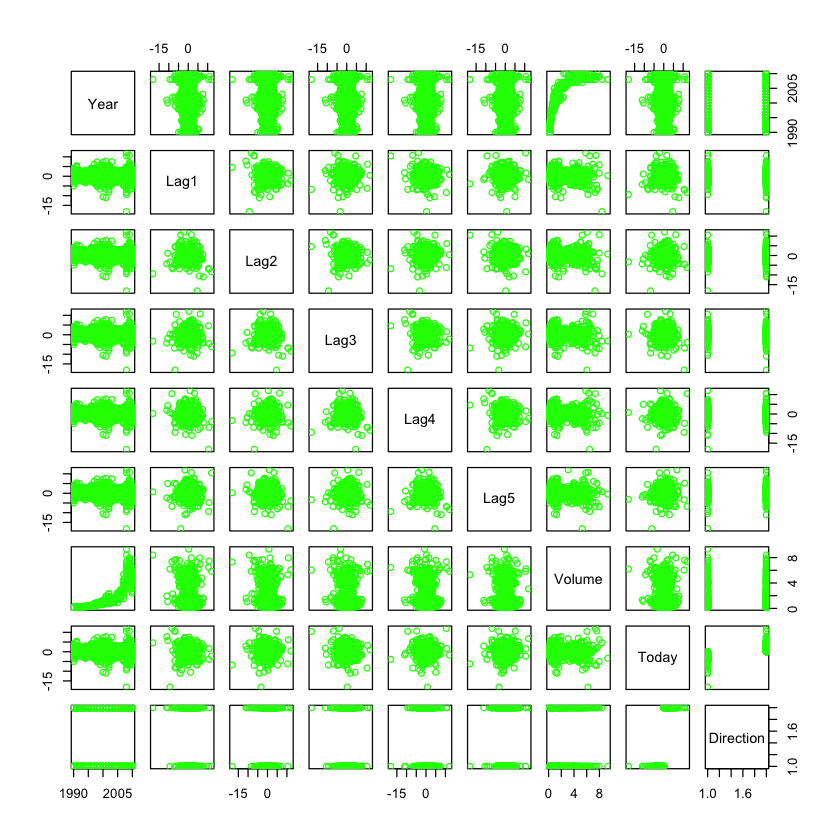

In [6]:
plot(Weekly, col="green")

O plot indica que todas as variáveis de atraso estão fracamente correlacionadas entre si. 

A partir do gráfico de dispersão, também é possível notar que os volumes de ações negociados estão aumentando 
rapidamente, em uma base anual.

Como observado anteriormente, as variáveis ​​Lag são fracamente correlacionadas e existe uma forte correlação
entre o ano e o volume.

In [23]:
cor(Weekly[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


In [10]:
table(Weekly$Direction)/sum(table(Weekly$Direction))


     Down        Up 
0.4444444 0.5555556 

Cerca de 44 porcento dos dados são classificados como valores para baixo e 55 porcento são classificados como valores
para cima.

É importante observar que Direcional é simplesmente uma forma nominal do recurso Hoje.
Esse deve ser o caso, já que Hoje fornece o aumento percentual ou a redução da semana atual,
e a variável Direção simplesmente mapeia esses valores para "Para cima" e "Para baixo", respectivamente.

In [32]:
head(Weekly[,c(8,9)])

Today,Direction
-0.270,Down
-2.576,Down
3.514,Up
0.712,Up
1.178,Up
-1.372,Down


Como pode ser visto abaixo, as únicas variáveis ​​estatisticamente significativas (com um valor de confiança de 5 porcento)
são Lag1 e Lag2.

In [33]:
glm.fit <- glm(Direction~.-Year-Today,data=Weekly,family="binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ . - Year - Today, family = "binomial", 
    data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


A partir da tabela abaixo, pode-se observar que o algoritmo classifica cerca de 56% das observações corretamente. Ele também funciona bem nos dias em que o estoque aumenta, já que cerca de 92% das entradas "Up" são classificadas corretamente. No entanto, ele apresenta um desempenho ruim nos dias em que o mercado está em baixa, com cerca de 11% desses casos classificados corretamente.

In [34]:
glm.probs <- predict(glm.fit,type = "response")
glm.pred <- rep("Down",nrow(Weekly))
glm.pred[glm.probs>0.5] = "Up"

table(glm.pred,Weekly$Direction)

        
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [35]:
mean(glm.pred == Weekly$Direction)

[1] 0.5610652

In [36]:
558/(558+47)

[1] 0.922314

In [37]:
56/(428+56)

[1] 0.1157025

In [38]:
train <- Weekly[,"Year"] <= 2008

glm.fit <- glm(Direction~Lag2,data = Weekly,subset = train, family = "binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [39]:
glm.probs <- predict(glm.fit,Weekly[!train,],type = "response")

glm.pred <- rep("Down",nrow(Weekly))
glm.pred[glm.probs>0.5] = "Up"

table(glm.pred,Weekly[,"Direction"]) # Matrix de confusão.

        
glm.pred Down  Up
    Down   63  85
    Up    421 520

In [40]:
mean(glm.pred == Weekly[,"Direction"]) # Fração de previsões corretas.

[1] 0.5353535

In [41]:
library(MASS)

lda.fit <- lda(Direction~Lag2,data=Weekly,subset=train)
lda.fit

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [42]:
lda.pred <- predict(lda.fit,Weekly[!train,])
lda.class <- lda.pred$class

table(lda.class,Weekly[!train,9])

         
lda.class Down Up
     Down    9  5
     Up     34 56

In [43]:
mean(lda.class == Weekly[!train,9])

[1] 0.625

In [44]:
qda.fit <- qda(Direction~Lag2,data=Weekly,subset=train)
qda.fit

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [45]:
qda.pred <- predict(qda.fit,Weekly[!train,])
qda.class <- qda.pred$class

table(qda.class,Weekly[!train,9])

         
qda.class Down Up
     Down    0  0
     Up     43 61

In [46]:
mean(qda.class == Weekly[!train,9])

[1] 0.5865385

O modelo de melhor desempenho é o LDA, pois possui a maior precisão de previsão (cerca de 68%).